<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Определение-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Определение-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Определение признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-на-различных-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов на различных этапах очистки</a></span></li><li><span><a href="#Анализ-распределения-размеров-гранул-сырья" data-toc-modified-id="Анализ-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ распределения размеров гранул сырья</a></span></li><li><span><a href="#Определение-суммарной-концентрации-всех-веществ-по-стадиям" data-toc-modified-id="Определение-суммарной-концентрации-всех-веществ-по-стадиям-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Определение суммарной концентрации всех веществ по стадиям</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Symmetric-Mean-Absolute-Percentage-Error" data-toc-modified-id="Symmetric-Mean-Absolute-Percentage-Error-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Symmetric Mean Absolute Percentage Error</a></span></li><li><span><a href="#Модели" data-toc-modified-id="Модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Dummy-Regressor" data-toc-modified-id="Dummy-Regressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dummy Regressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование технологического процесса очистки золота

В данной исследовательской работе мы подготовим прототип модели машинного обучения для компании "Цифра". Компания разрабатывает решения для эффективной работы промышленных предприятий.

**Цели исследования** - подготовить модель предсказания коэффициента восстановления золота из золотосодержащей руды. 

**Ход исследования:**
1. Подготовка данных.
2. Анализ данных.
3. Построение моделей.

## Подготовка данных

### Обзор данных

Импортируем необходимые для анализа библиотеки и данные.

In [1]:
# Импорт стандартных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
try:
    full_df = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                          'Data Science\\Обучение в Яндекс\\'
                          '10. Сборный проект 2\\gold_recovery_full_new.csv')
    train_df = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                           'Data Science\\Обучение в Яндекс\\'
                           '10. Сборный проект 2\\gold_recovery_train_new.csv')
    test_df = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                          'Data Science\\Обучение в Яндекс\\'
                          '10. Сборный проект 2\\gold_recovery_test_new.csv')
except:
    full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')

Выведем данные на экран для ознакомления.

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Из обзора данных можно сделать следующие выводы:
1. Общее количество строк данных - 19439.
2. Общее количество признаков данных - 86.
3. В данных имеются NAN значения.
4. Все данные приоритетно формата float, за исключением индексных значений даты и времени замеров.

### Проверка эффективности обогащения

Рассчитаем среднюю абсолютную ошибку эффективности обогащиния между имеющимися данными и расчетными значениями.

In [9]:
'''Функция для расчета средней абсолютной ошибки
эффективности обогащения руды'''


def recovery(data):
    c = data['rougher.output.concentrate_au']
    f = data['rougher.input.feed_au']
    t = data['rougher.output.tail_au']
    recovery = (c * (f - t)) / (f * (c - t)) * 100
    return recovery


recovery_data = train_df['rougher.output.recovery']
recovery_calculated = recovery(train_df)

mean_absolute_error = mean_absolute_error(recovery_data, recovery_calculated)
display(mean_absolute_error)

9.73512347450521e-15

Средняя абсолютная ошибка эффективности обогащения достаточно мала, чтобы предположить, что эффективность обогащения была рассчитана верно.

### Определение признаков, недоступных в тестовой выборке

In [10]:
set(train_df.columns) - set(test_df.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовую выборку не включены выходные параметры продукта (output) и расчетные характеристики (calculation) каждой из стадий обработки сырья. Данные признаки являются шумом для моделей машинного обучения, т.к. если обучать модели по ключевым признакам - произойдет их утечка. Соответственно необходимо будет избавиться от данных признаков при обучении моделей на тестовой выборке.

### Предобработка данных

**Проверка на NAN**

In [11]:
display(f'Количество NAN до обработки: {full_df.isna().sum().sum()}')
display(f'Количество NAN до обработки: {train_df.isna().sum().sum()}')
display(f'Количество NAN до обработки: {test_df.isna().sum().sum()} \n')


def ffill(data):
    data = data.fillna(method='ffill')
    return data


full_df = ffill(full_df)
train_df = ffill(train_df)
test_df = ffill(test_df)

display(f'Количество NAN после обработки: {full_df.isna().sum().sum()}')
display(f'Количество NAN после обработки: {train_df.isna().sum().sum()}')
display(f'Количество NAN после обработки: {test_df.isna().sum().sum()}')

'Количество NAN до обработки: 4481'

'Количество NAN до обработки: 4100'

'Количество NAN до обработки: 90 \n'

'Количество NAN после обработки: 0'

'Количество NAN после обработки: 0'

'Количество NAN после обработки: 0'

Много пропущенных значений, удалить их не удастся. Т.к. соседние по дате значения, по условиям задачи, похожи, то заменим NAN ими.

**Проверка на дубликаты**

In [12]:
display(full_df.duplicated().sum())
display(train_df.duplicated().sum())
display(test_df.duplicated().sum())

0

0

0

Дубликаты в выборках отсутствуют.

### Вывод

Из обзора данных можно сделать следующие выводы:
1. Общее количество строк данных - 19439.
2. Общее количество признаков данных - 86.
3. В данных имеются NAN значения.
4. Все данные приоритетно формата float, за исключением индексных значений даты и времени замеров.
5. В тестовой выборке признаков меньше - 52 - в них отсуствуют целевые признаки.

В данном разделе была проведена предобработка данных. В данных выявлены пропущенные значения, которые были заменены схожими ближайшими значениями методом *fillna()* с аргументом *ffill*.

## Анализ данных

### Анализ концентрации металлов на различных этапах очистки

Проведем анализ концентрации металлов на различных этапах очистки сырья. Построим соответствующие гистограммы.

In [13]:
'''Функция для построения гистограмм концентрации металлов в сырье
'''


def build_hist(metal):
    plt.figure(figsize=[12, 9])
    plt.hist(full_df.loc[:, (full_df.columns.str.contains('final.output.concentrate') &
                             full_df.columns.str.contains(metal))],
             bins=100,
             label='финальный концентрат',
             alpha=.5)
    plt.hist(full_df.loc[:, (full_df.columns.str.contains('secondary_cleaner.output.tail') &
                             full_df.columns.str.contains(metal))],
             bins=100,
             label='вторичная очистка',
             alpha=.5)
    plt.hist(full_df.loc[:, (full_df.columns.str.contains('primary_cleaner.output.concentrate') &
                             full_df.columns.str.contains(metal))],
             bins=100,
             label='первичная очистка',
             alpha=.5)
    plt.hist(full_df.loc[:, (full_df.columns.str.contains('rougher.output.concentrate') &
                             full_df.columns.str.contains(metal))],
             bins=100,
             label='флотация',
             alpha=.5)
    plt.hist(full_df.loc[:, (full_df.columns.str.contains('rougher.input.feed') &
                             full_df.columns.str.contains(metal))],
             bins=100,
             label='сырье',
             alpha=.5)
    plt.xlabel(f'Концентрация {metal} на выходе')
    plt.ylabel('Количество наблюдений')
    plt.legend(loc='upper left', fontsize='x-large')
    plt.title(f'Гистограмма распределения концентрации {metal}')
    plt.show()

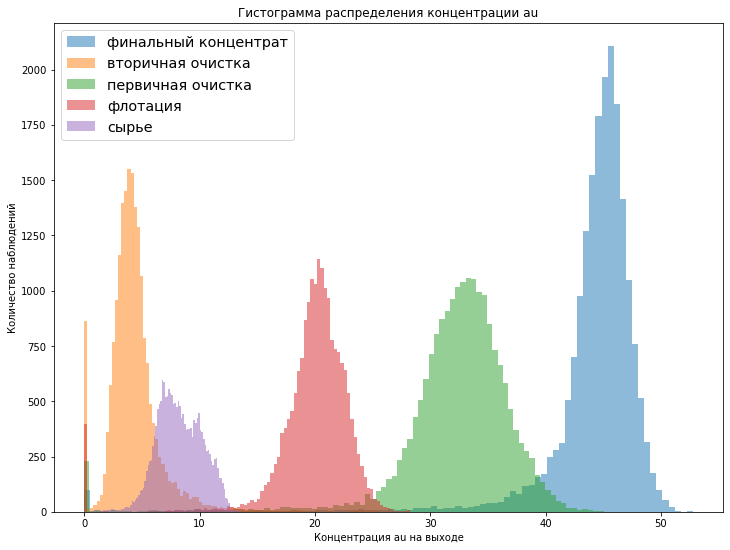

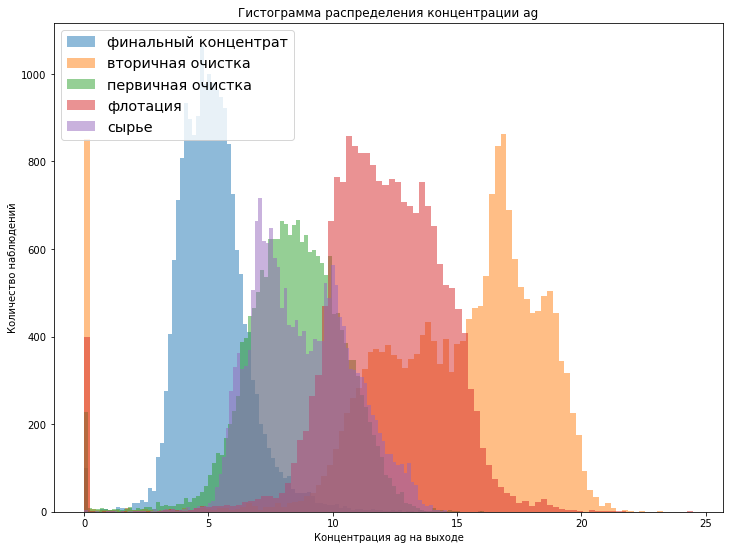

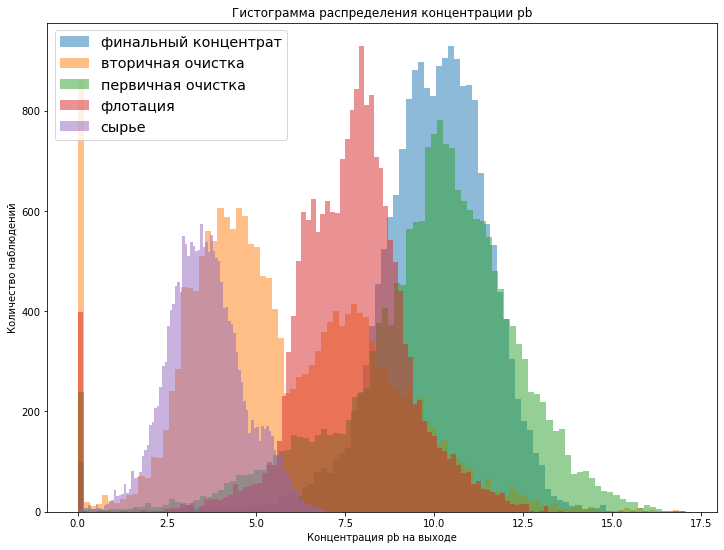

In [14]:
build_hist('au')
build_hist('ag')
build_hist('pb')

Из гистогамм видно, что концентрация золота (au) от сырья к финальному продукту растет (в 4 раза). Это означает, что этапы очистки сырья от примесей и извлечение золотых фракций проходит в целом успешно.

Концентрация серебра (ag) и свинца (pb) в целом остается неизменной. Скорее всего это связано с узкой направленностью процессов очистки именно на извлечение золотых фракций.

### Анализ распределения размеров гранул сырья

Проведем анализ распределения размеров гранул сырья на обучающей и тестовой выборках для определения корректности обучения моделей.

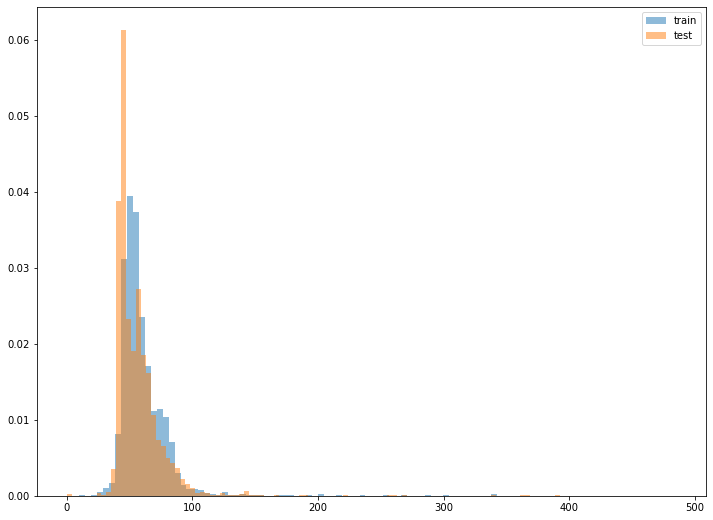

In [15]:
plt.figure(figsize=(12, 9))
plt.hist(train_df['rougher.input.feed_size'],
         label='размер гранул',
         bins=100,
         alpha=.5,
         density=True)
plt.hist(test_df['rougher.input.feed_size'],
         label='размер гранул',
         bins=100,
         alpha=.5,
         density=True)
plt.legend(['train', 'test'])
plt.show()

Из гистограммы видно, что гранулы сырья распределены равномерно, в связи с чем имеющиеся данные о размерности сырья можно использовать для обучения моделей.

### Определение суммарной концентрации всех веществ по стадиям

Определим суммарную концентрацию всех веществ по стадиям.

In [16]:
'''Создание дополнительных колонок с концентрацией
всех веществ по стадиям обработки сырья
'''

full_df['rougher.input.feed_sum'] = (full_df['rougher.input.feed_au']
                                     + full_df['rougher.input.feed_ag']
                                     + full_df['rougher.input.feed_pb']
                                     + full_df['rougher.input.feed_sol'])
full_df['rougher.output.concentrate_sum'] = (full_df['rougher.output.concentrate_au']
                                             + full_df['rougher.output.concentrate_ag']
                                             + full_df['rougher.output.concentrate_pb']
                                             + full_df['rougher.output.concentrate_sol'])
full_df['primary_cleaner.output.concentrate_sum'] = (full_df['primary_cleaner.output.concentrate_au']
                                                     + full_df['primary_cleaner.output.concentrate_ag']
                                                     + full_df['primary_cleaner.output.concentrate_pb']
                                                     + full_df['primary_cleaner.output.concentrate_sol'])
full_df['final.output.concentrate_sum'] = (full_df['final.output.concentrate_au']
                                           + full_df['final.output.concentrate_ag']
                                           + full_df['final.output.concentrate_pb']
                                           + full_df['final.output.concentrate_sol'])

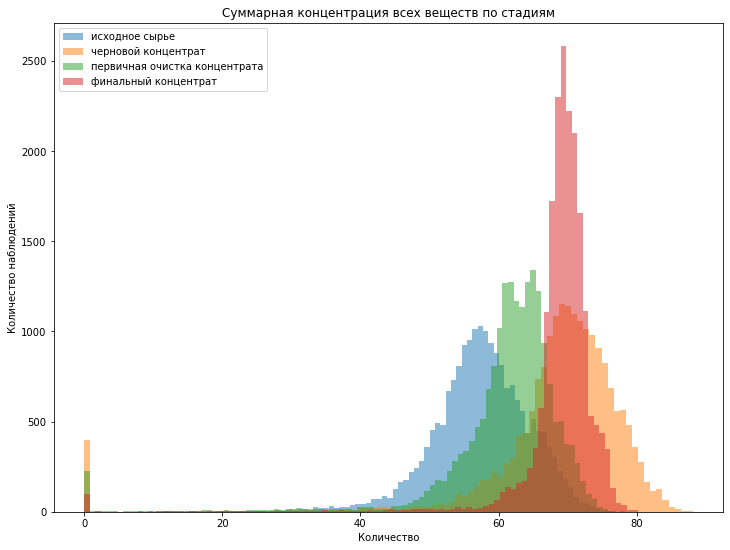

In [17]:
plt.figure(figsize=(12, 9))
plt.hist(full_df['rougher.input.feed_sum'],
         bins=100,
         label='исходное сырье',
         alpha=.5)
plt.hist(full_df['rougher.output.concentrate_sum'],
         bins=100,
         label='черновой концентрат',
         alpha=.5)
plt.hist(full_df['primary_cleaner.output.concentrate_sum'],
         bins=100,
         label='первичная очистка концентрата',
         alpha=.5)
plt.hist(full_df['final.output.concentrate_sum'],
         bins=100,
         label='финальный концентрат',
         alpha=.5)
plt.xlabel('Количество')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.title('Суммарная концентрация всех веществ по стадиям')
plt.show()

Из гистограммы видно, что наибольшая концентрация вещества получается после 1 и 2 стадии очистки на финальном концентрате. Концентрация вещества после флотации вырастает немного. 

На гистограммах видны аномальные значения: часть суммарных значений концентрации всех веществ равна нулю. Рассмотрим данные аномалии для принятия дальшейших решений по ним.

In [18]:
columns_list = ['rougher.input.feed_sum',
                'rougher.output.concentrate_sum',
                'primary_cleaner.output.concentrate_sum',
                'final.output.concentrate_sum']
quantity_list = []
for column in columns_list:
    quantity = full_df[full_df[column] == 0][column].count()
    quantity_list.append(quantity)

display(sum(quantity_list))
display(sum(quantity_list) / len(full_df) * 100, '%')

600

3.0865785277020423

'%'

Из анализа видно, что нулевых значений около 3% от длины датасета. Аномальных значений мало, можно их удалить.

In [19]:
full_df = full_df[(full_df['final.output.concentrate_ag'] != 0) &
                  (full_df['final.output.concentrate_pb'] != 0) &
                  (full_df['final.output.concentrate_sol'] != 0) &
                  (full_df['final.output.concentrate_au'] != 0) &
                  (full_df['primary_cleaner.output.concentrate_ag'] != 0) &
                  (full_df['primary_cleaner.output.concentrate_pb'] != 0) &
                  (full_df['primary_cleaner.output.concentrate_sol'] != 0) &
                  (full_df['primary_cleaner.output.concentrate_au'] != 0) &
                  (full_df['rougher.output.concentrate_ag'] != 0) &
                  (full_df['rougher.output.concentrate_pb'] != 0) &
                  (full_df['rougher.output.concentrate_sol'] != 0) &
                  (full_df['rougher.output.concentrate_au'] != 0) &
                  (full_df['rougher.input.feed_ag'] != 0) &
                  (full_df['rougher.input.feed_pb'] != 0) &
                  (full_df['rougher.input.feed_sol'] != 0) &
                  (full_df['rougher.input.feed_au'] != 0)
                  ]
train_df = train_df[(train_df['final.output.concentrate_ag'] != 0) &
                    (train_df['final.output.concentrate_pb'] != 0) &
                    (train_df['final.output.concentrate_sol'] != 0) &
                    (train_df['final.output.concentrate_au'] != 0) &
                    (train_df['primary_cleaner.output.concentrate_ag'] != 0) &
                    (train_df['primary_cleaner.output.concentrate_pb'] != 0) &
                    (train_df['primary_cleaner.output.concentrate_sol'] != 0) &
                    (train_df['primary_cleaner.output.concentrate_au'] != 0) &
                    (train_df['rougher.output.concentrate_ag'] != 0) &
                    (train_df['rougher.output.concentrate_pb'] != 0) &
                    (train_df['rougher.output.concentrate_sol'] != 0) &
                    (train_df['rougher.output.concentrate_au'] != 0) &
                    (train_df['rougher.input.feed_ag'] != 0) &
                    (train_df['rougher.input.feed_pb'] != 0) &
                    (train_df['rougher.input.feed_sol'] != 0) &
                    (train_df['rougher.input.feed_au'] != 0)
                    ]

test_df = test_df[(test_df['rougher.input.feed_ag'] != 0) &
                  (test_df['rougher.input.feed_pb'] != 0) &
                  (test_df['rougher.input.feed_sol'] != 0) &
                  (test_df['rougher.input.feed_au'] != 0)
                  ]

display(full_df.shape)
display(train_df.shape)
display(test_df.shape)

(18838, 91)

(13716, 87)

(5290, 53)

Аномальные значения удалены.

### Вывод

Нами проанализирована концентрация металлов на различной стадии очистки смеси золотоносной руды, распределение размеров гранул сырья в зависимости от стадии и определена суммарная концентрация всех вещест на каждой из стадий. С каждой последующей стадией очистки смеси золотоносной руды процет содержания золота в ней неуклонно растет. Это говорит о существующей эффективности очистки руды.

Распределение размеров гранул сырья в обучающей и тестовой выборке одинаковое. Данный признак можно использовать для обучения моделей. 

Концентрация металлов с каждой стадией очистки увеличивается, но в большей степени за счет роста доли золота в руде. Доля остальные металлов остается неизменной.

## Обучение моделей

### Symmetric Mean Absolute Percentage Error 

Создадим функции для расчета симметричного среднего абсолютного процентного отклонения и итогового симметричного среднего абсолютного процентного отклонения **(sMAPE и итоговый sMAPE).**

In [20]:
state = np.random.RandomState(12345)


def smape(predictions, target):
    smape = ((1 / len(target)) *
             (sum(abs(target - predictions) /
                  ((abs(target) + abs(predictions)) / 2) * 100)))
    return smape


def final_smape(rougher, final):
    final_smape = 0.25 * rougher + 0.75 * final
    return final_smape

In [21]:
columns = test_df.columns
features = train_df[columns].drop('date', axis=1)

target_rougher = train_df['rougher.output.recovery']
target_final = train_df['final.output.recovery']

### Модели

Обучим несколько предсказательных моделей и посмотрим на их метрики.

#### Decision Tree Regressor

In [22]:
best_depth_dtr = 0
best_smape_dtr = 100
for depth in range(1, 5):
    model_dtr = DecisionTreeRegressor(random_state=state, max_depth=depth)
    scorer = make_scorer(smape)
    cross_val_score_rougher = cross_val_score(model_dtr,
                                              features,
                                              target_rougher,
                                              scoring=scorer, cv=5)
    cross_val_score_final = cross_val_score(model_dtr,
                                            features,
                                            target_final,
                                            scoring=scorer,
                                            cv=5)
    total_smape = final_smape(cross_val_score_rougher.mean(),
                              cross_val_score_final.mean())
    if abs(total_smape) < best_smape_dtr:
        best_depth_dtr = depth
        best_smape_dtr = abs(total_smape)
display (f'Итоговое симметричное среднее абсолютное процентное отклонение: {best_smape_dtr},',
       f'максимальная глубина: {best_depth_dtr}')

'Итоговое симметричное среднее абсолютное процентное отклонение: 8.894948412843116,'

'максимальная глубина: 3'

#### Random Forest Regressor

**Случайный лес**

In [23]:
best_smape_rfr = 100
best_est_rfr = 0
best_depth_rfr = 0
for est in range(1, 50, 10):
    for depth in range(1, 5, 1):
        model_rfr = RandomForestRegressor(random_state=state,
                                          n_estimators=est,
                                          max_depth=depth)
        scorer = make_scorer(smape)
        cross_val_score_rougher = cross_val_score(model_rfr,
                                                  features,
                                                  target_rougher,
                                                  scoring=scorer,
                                                  cv=5)
        cross_val_score_final = cross_val_score(model_rfr,
                                                features,
                                                target_final,
                                                scoring=scorer,
                                                cv=5)
        total_smape = final_smape(cross_val_score_rougher.mean(),
                                  cross_val_score_final.mean())
        if abs(total_smape) < best_smape_rfr:
            best_smape_rfr = abs(total_smape)
            best_est_rfr = est
            best_depth_rfr = depth
display(f'Итоговое симметричное среднее абсолютное процентное отклонение: {best_smape_rfr},',
      f'количество деревьев: {best_est_rfr}, максимальная глубина: {best_depth_rfr}')

'Итоговое симметричное среднее абсолютное процентное отклонение: 8.410985820357338,'

'количество деревьев: 41, максимальная глубина: 4'

In [24]:
model_lr = LinearRegression()

scorer = make_scorer(smape)
cross_val_score_rougher = cross_val_score(model_lr,
                                          features,
                                          target_rougher,
                                          scoring=scorer,
                                          cv=5)
cross_val_score_final = cross_val_score(model_lr,
                                        features,
                                        target_final,
                                        scoring=scorer,
                                        cv=5)

best_smape_lr = abs(final_smape(cross_val_score_rougher.mean(),
                                cross_val_score_final.mean()))

display (f'Итоговое симметричное среднее абсолютное процентное отклонение: {best_smape_lr}')

'Итоговое симметричное среднее абсолютное процентное отклонение: 10.023124524855437'

По итогам обучения лучший результат показывает модель Случайного леса с итоговым симметричным средним абсолютным процентным отклонением: 8.41

### Проверка лучшей модели на тестовой выборке

Проверим работу Случайного леса на тестовой выборке.

In [25]:
target_test = full_df[['date',
                       'rougher.output.recovery',
                       'final.output.recovery']]

test_test = test_df.merge(target_test,
                          on=['date'],
                          how='left')

test_test = test_test.dropna()

target_test_rougher = test_test['rougher.output.recovery']
target_test_final = test_test['final.output.recovery']

features_test = test_test.drop(['date',
                                'rougher.output.recovery',
                                'final.output.recovery'], axis=1)

In [26]:
model_rfr = RandomForestRegressor(random_state=state,
                                  n_estimators=best_est_rfr,
                                  max_depth=best_depth_rfr)

model_rfr.fit(features, target_rougher)
predictions_rougher = model_rfr.predict(features_test)

model_rfr.fit(features, target_final)
predictions_final = model_rfr.predict(features_test)

smape_score_rougher = smape(predictions_rougher, target_test_rougher)
smape_score_final = smape(predictions_final, target_test_final)

best_smape_rfr = abs(final_smape(smape_score_rougher, smape_score_final))

display(f'Итоговое симметричное среднее абсолютное процентное отклонение: {best_smape_rfr},',
      f'количество деревьев: {best_est_rfr}, максимальная глубина: {best_depth_rfr}')

'Итоговое симметричное среднее абсолютное процентное отклонение: 7.231416100600237,'

'количество деревьев: 41, максимальная глубина: 4'

Модель показывает метрику лучше, чем на обучающей выборке.

### Dummy Regressor

Обучим стандартную предсказательную модель для определения качества предсказательной силы Случайного леса.

In [27]:
model_dr = DummyRegressor()

model_dr.fit(features, target_rougher)
predictions_rougher = model_dr.predict(features_test)

model_dr.fit(features, target_final)
predictions_final = model_dr.predict(features_test)

smape_score_rougher = smape(predictions_rougher, target_test_rougher)
smape_score_final = smape(predictions_final, target_test_final)

model_dr = abs(final_smape(smape_score_rougher, smape_score_final))

display(best_smape_rfr)

7.231416100600237

### Вывод

Из итоговой метрики sMAPE видно, что наша модель по предсказательной силе оказалась хуже, чем стандартная модель. На тестовой выборке у Случайного леса показаатель sMAPE = 7.41, а у Дамми регрессора sMAPE = 7.23.

## Общий вывод

Нами проанализирована концентрация металлов на различной стадии очистки смеси золотоносной руды, распределение размеров гранул сырья в зависимости от стадии и определена суммарная концентрация всех вещест на каждой из стадий. С каждой последующей стадией очистки смеси золотоносной руды процет содержания золота в ней неуклонно растет. Это говорит о существующей эффективности очистки руды.

Распределение размеров гранул сырья в обучающей и тестовой выборке одинаковое. Данный признак можно использовать для обучения моделей. 

Концентрация металлов с каждой стадией очистки увеличивается, но в большей степени за счет роста доли золота в руде. Доля остальные металлов остается неизменной.

После анализа и подготовки данных были обучены 3 модели:
* Дерево решений.
* Случайный лес.
* Логистическая регрессия.

Все модели показали приблизительно одинаковый результат. Лучшей моделью выбран Случайный лес с показателем sMAPE = 8.41.

Однако, при проверке Случайного леса на тестовой выборке было определено, что метрика модели отличается от стандартной предсказательной модели базовой линии в худшую сторону (sMAPE базовой модели = 7.23, sMAPE Случайного леса = 7.41).